In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 26 16:00:07 2021

In [ ]:
@author: Ganesh Prasad
"""
# Load Libraries

In [29]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
#import graphviz

Import the dataset

In [30]:
df = pd.read_csv("D:/datatrained_project/practice projects/mashroom/mushrooms.csv")

Have a look into data

In [31]:
print("\n Have a look into records", df.head(10))


 Have a look into records   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   
5     e         x           y         y       t    a               f   
6     e         b           s         w       t    a               f   
7     e         b           y         w       t    l               f   
8     p         x           y         w       t    p               f   
9     e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...  

column and data type

In [32]:
print("\n Column and Data Type", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

shape of data type

In [33]:
print("\n Shape of Dataset", df.shape)


 Shape of Dataset (8124, 23)


stats of dataset

In [34]:
print("\n Describe the Data ", df.describe())


 Describe the Data         class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1 

validate class is having only two attribute

In [35]:
print("\n Unique value in Class ", df["class"].unique())


 Unique value in Class  ['p' 'e']


Class distribution for e and p

In [36]:
print("\n Count of the class for e and p", df['class'].value_counts())


 Count of the class for e and p e    4208
p    3916
Name: class, dtype: int64


In [37]:
nan_in_df = df.isnull().values.sum()

Print the dataframe for NAN

In [38]:
print("Null value in input column",nan_in_df)

Null value in input column 0


In [39]:
print("Null in feature column",df['class'].isnull().values.sum())

Null in feature column 0


In [40]:
for column in df.columns:
    df[column] = pd.get_dummies(df[column])

In [41]:
print("\n data after one hot encoding",df.head(10))


 data after one hot encoding    class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      0          0            0          0        0     0                0   
1      1          0            0          0        0     1                0   
2      1          1            0          0        0     0                0   
3      0          0            0          0        0     0                0   
4      1          0            0          0        1     0                0   
5      1          0            0          0        0     1                0   
6      1          1            0          0        0     1                0   
7      1          1            0          0        0     0                0   
8      0          0            0          0        0     0                0   
9      1          1            0          0        0     1                0   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             1          0 

class distribution

In [42]:
print(df.groupby('class').size())

class
0    3916
1    4208
dtype: int64


Unimodal Data Visualizations

histograms

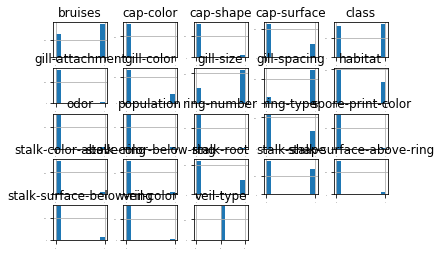

In [43]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

Multimodal Data Visualizations

correlation matrix

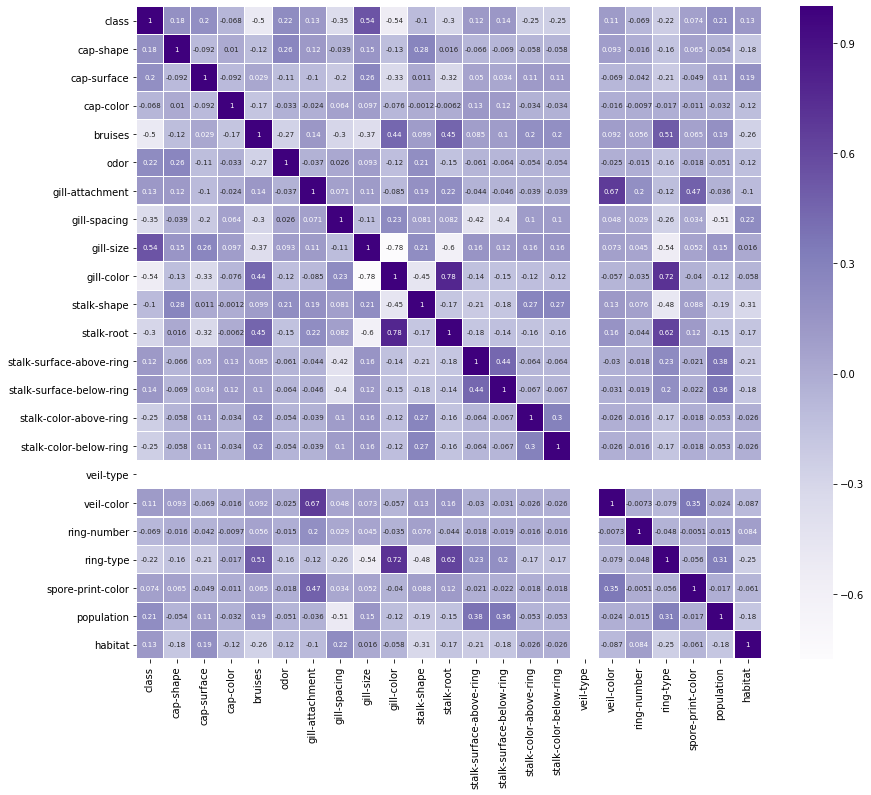

In [44]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)
plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

# Validation Dataset

Split-out validation dataset

In [45]:
array = df.values
X = array[:,1:22]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

Test options and evaluation metric

In [46]:
num_folds = 10
seed = 7
scoring = 'accuracy'

Spot-Check Algorithms

In [47]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [48]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Output
# LR: 0.949684 (0.005679)
# LDA: 0.939374 (0.007613)
# KNN: 0.973072 (0.006961)
# CART: 0.979228 (0.003844)
# NB: 0.893216 (0.016749)
# SVM: 0.978920 (0.004460)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.950761 (0.006884)
LDA: 0.939374 (0.007613)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNN: 0.978920 (0.004768)
CART: 0.979228 (0.003844)
NB: 0.893216 (0.016749)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM: 0.963532 (0.006159)


Compare Algorithms

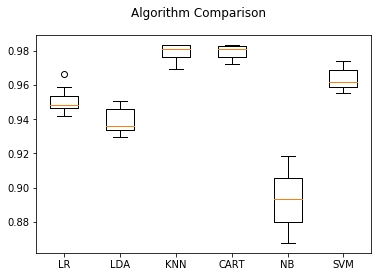

In [49]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Evaluate Algorithms: Standardize/Normalize data

to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines<br>
that standardize the data and build the # model for each fold in the cross-validation test harness.<br>
That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

Standardize the dataset

In [50]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []

In [51]:
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
##Output
# ScaledLR: 0.953223 (0.006505)
# ScaledLDA: 0.939374 (0.007613)
# ScaledKNN: 0.976611 (0.005237)
# ScaledCART: 0.979228 (0.003844)
# ScaledNB: 0.910600 (0.006561)
# ScaledSVM: 0.978766 (0.004228)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

ScaledLR: 0.953223 (0.006505)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


ScaledLDA: 0.939374 (0.007613)
ScaledKNN: 0.973533 (0.006488)
ScaledCART: 0.979228 (0.003844)
ScaledNB: 0.910600 (0.006561)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

ScaledSVM: 0.978766 (0.004228)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Compare Algorithms

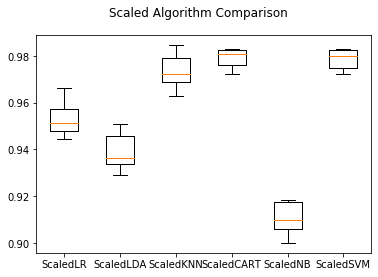

In [52]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

After investigate tuning the parameters for two algorithms that show promise from<br>
In the spot-checking highest score is for : KNN and SVM.<br>
Output is<br>
ScaledLR: 0.953223 (0.006505)<br>
ScaledLDA: 0.939374 (0.007613)<br>
ScaledKNN: 0.976611 (0.005237)<br>
ScaledCART: 0.979228 (0.003844)<br>
ScaledNB: 0.910600 (0.006561)<br>
ScaledSVM: 0.978766 (0.004228)

Tuning KNN

Tune scaled KNN

In [53]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.979074 using {'n_neighbors': 1}
0.979074 (0.004468) with: {'n_neighbors': 1}
0.974304 (0.007090) with: {'n_neighbors': 3}
0.973534 (0.006488) with: {'n_neighbors': 5}
0.973073 (0.006927) with: {'n_neighbors': 7}
0.972457 (0.007103) with: {'n_neighbors': 9}
0.976458 (0.004718) with: {'n_neighbors': 11}
0.976920 (0.005102) with: {'n_neighbors': 13}
0.976920 (0.005102) with: {'n_neighbors': 15}
0.976920 (0.005102) with: {'n_neighbors': 17}
0.976920 (0.005102) with: {'n_neighbors': 19}
0.976920 (0.005102) with: {'n_neighbors': 21}


utput after tunning of KNN<br>
Best: 0.979074 using {'n_neighbors': 1}<br>
0.979074 (0.004468) with: {'n_neighbors': 1}<br>
0.973533 (0.006632) with: {'n_neighbors': 3}<br>
0.977688 (0.005348) with: {'n_neighbors': 5}<br>
0.978613 (0.004319) with: {'n_neighbors': 7}<br>
0.977843 (0.004361) with: {'n_neighbors': 9}<br>
0.976458 (0.004718) with: {'n_neighbors': 11}<br>
0.976920 (0.005102) with: {'n_neighbors': 13}<br>
0.976920 (0.005102) with: {'n_qneighbors': 15}<br>
0.976920 (0.005102) with: {'n_neighbors': 17}<br>
0.976920 (0.005102) with: {'n_neighbors': 19}<br>
0.976920 (0.005102) with: {'n_neighbors': 21}<br>
Best: 0.979689 using {'C': 1.7, 'kernel': 'rbf'}

Tuning SVM<br>
tune two key parameters of the SVM algorithm, the value of C (how much to relax the<br>
margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial<br>
Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid<br>
search using 10-fold cross-validation with a standardized copy of the training dataset. We will<br>
try a number of simpler kernel types and C values with less bias and more bias (less than and<br>
more than 1.0 respectively).

Tune scaled SVM

In [54]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Best: 0.979689 using {'C': 2.0, 'kernel': 'poly'}
0.958147 (0.005995) with: {'C': 0.1, 'kernel': 'linear'}
0.935529 (0.010092) with: {'C': 0.1, 'kernel': 'poly'}
0.972611 (0.007311) with: {'C': 0.1, 'kernel': 'rbf'}
0.915833 (0.005733) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.959224 (0.006860) with: {'C': 0.3, 'kernel': 'linear'}
0.973073 (0.007195) with: {'C': 0.3, 'kernel': 'poly'}
0.972765 (0.007156) with: {'C': 0.3, 'kernel': 'rbf'}
0.897215 (0.009146) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.959224 (0.006860) with: {'C': 0.5, 'kernel': 'linear'}
0.972457 (0.006655) with: {'C': 0.5, 'kernel': 'poly'}
0.973381 (0.006641) with: {'C': 0.5, 'kernel': 'rbf'}
0.898754 (0.007404) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.959224 (0.006860) with: {'C': 0.7, 'kernel': 'linear'}
0.978920 (0.004407) with: {'C': 0.7, 'kernel': 'poly'}
0.978920 (0.004407) with: {'C': 0.7, 'kernel': 'rbf'}
0.897677 (0.008627) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.959224 (0.006860) with: {'C': 0.9, 'kernel': 'linear

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.958147 (0.005995) with: {'C': 0.1, 'kernel': 'linear'}<br>
0.938297 (0.010319) with: {'C': 0.1, 'kernel': 'poly'}<br>
0.972610 (0.007311) with: {'C': 0.1, 'kernel': 'rbf'}<br>
0.913678 (0.005089) with: {'C': 0.1, 'kernel': 'sigmoid'}<br>
0.959224 (0.006860) with: {'C': 0.3, 'kernel': 'linear'}<br>
0.973072 (0.007195) with: {'C': 0.3, 'kernel': 'poly'}<br>
0.972918 (0.007226) with: {'C': 0.3, 'kernel': 'rbf'}<br>
0.897522 (0.009191) with: {'C': 0.3, 'kernel': 'sigmoid'}<br>
0.959224 (0.006860) with: {'C': 0.5, 'kernel': 'linear'}<br>
0.973995 (0.005739) with: {'C': 0.5, 'kernel': 'poly'}<br>
0.974303 (0.005723) with: {'C': 0.5, 'kernel': 'rbf'}<br>
0.897059 (0.007856) with: {'C': 0.5, 'kernel': 'sigmoid'}<br>
0.959224 (0.006860) with: {'C': 0.7, 'kernel': 'linear'}<br>
0.978766 (0.004228) with: {'C': 0.7, 'kernel': 'poly'}<br>
0.978920 (0.004406) with: {'C': 0.7, 'kernel': 'rbf'}<br>
0.897521 (0.008708) with: {'C': 0.7, 'kernel': 'sigmoid'}<br>
0.959224 (0.006860) with: {'C': 0.9, 'kernel': 'linear'}<br>
0.978613 (0.004264) with: {'C': 0.9, 'kernel': 'poly'}<br>
0.978766 (0.004228) with: {'C': 0.9, 'kernel': 'rbf'}<br>
0.897828 (0.008950) with: {'C': 0.9, 'kernel': 'sigmoid'}<br>
0.959224 (0.006860) with: {'C': 1.0, 'kernel': 'linear'}<br>
0.978613 (0.004264) with: {'C': 1.0, 'kernel': 'poly'}<br>
0.978766 (0.004228) with: {'C': 1.0, 'kernel': 'rbf'}<br>
0.897675 (0.008790) with: {'C': 1.0, 'kernel': 'sigmoid'}<br>
0.959224 (0.006860) with: {'C': 1.3, 'kernel': 'linear'}<br>
0.979228 (0.004198) with: {'C': 1.3, 'kernel': 'poly'}<br>
0.978920 (0.004242) with: {'C': 1.3, 'kernel': 'rbf'}<br>
0.897675 (0.008461) with: {'C': 1.3, 'kernel': 'sigmoid'}<br>
0.959224 (0.006860) with: {'C': 1.5, 'kernel': 'linear'}<br>
0.979228 (0.004198) with: {'C': 1.5, 'kernel': 'poly'}<br>
0.978920 (0.004242) with: {'C': 1.5, 'kernel': 'rbf'}<br>
0.897368 (0.006993) with: {'C': 1.5, 'kernel': 'sigmoid'}<br>
0.959224 (0.006860) with: {'C': 1.7, 'kernel': 'linear'}<br>
0.979228 (0.004198) with: {'C': 1.7, 'kernel': 'poly'}<br>
0.979689 (0.003626) with: {'C': 1.7, 'kernel': 'rbf'}<br>
0.897368 (0.006993) with: {'C': 1.7, 'kernel': 'sigmoid'}<br>
0.959224 (0.006860) with: {'C': 2.0, 'kernel': 'linear'}<br>
0.979536 (0.003770) with: {'C': 2.0, 'kernel': 'poly'}<br>
0.979689 (0.003626) with: {'C': 2.0, 'kernel': 'rbf'}<br>
0.897059 (0.008438) with: {'C': 2.0, 'kernel': 'sigmoid'}

#########Ensemble Methods###########

evaluate four different ensemble machine learning<br>
algorithms, two boosting and two bagging methods:<br>
1. Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).<br>
2. Bagging Methods: Random Forests (RF) and Extra Trees (ET).

ensembles

In [55]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Output is
#AB: 0.940913 (0.005893)
#GBM: 0.967533 (0.007102)
#RF: 0.979536 (0.003510)
#ET: 0.979382 (0.003716)

AB: 0.940913 (0.005893)
GBM: 0.967533 (0.007102)
RF: 0.979689 (0.003626)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

ET: 0.979382 (0.003716)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Finalize model<br>
SVM showed the most promise as a low complexity and stable model for this problem. In<br>
so Finalize the model by training it on the entire training dataset and make<br>
predictions for the hold-out validation dataset to confirm

prepare the model

In [56]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9796923076923076
[[754  31]
 [  2 838]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       785
           1       0.96      1.00      0.98       840

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

